# Sentiment-Analyse

[nltk_data] Downloading package punkt to /Users/jankirenz/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/jankirenz/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


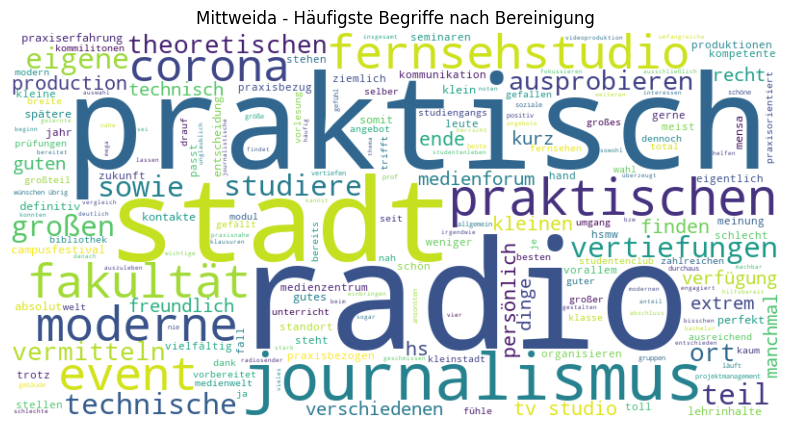

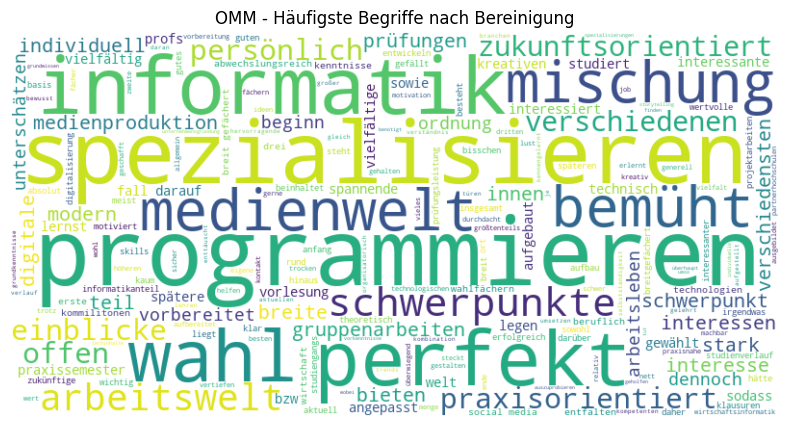

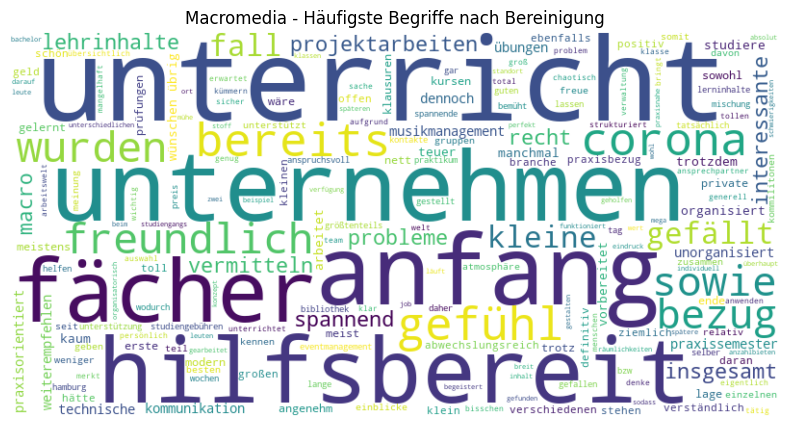

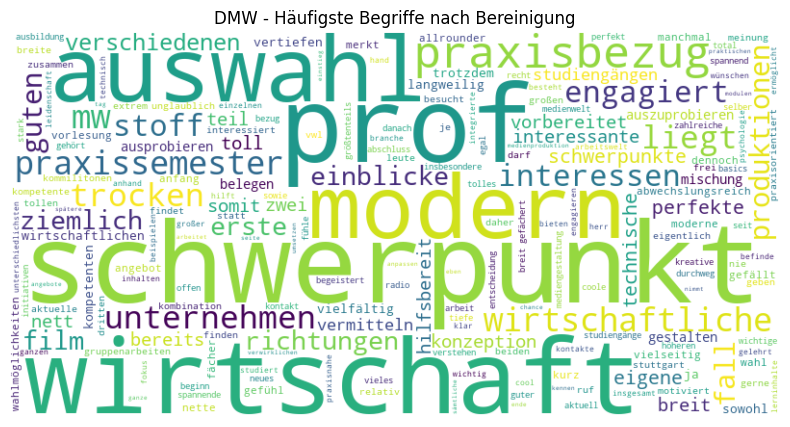

Analyse abgeschlossen und Ergebnisse gespeichert.


,Begriff,Häufigkeit,Studiengang
0,radio,24,Mittweida
1,praktisch,15,Mittweida
2,stadt,12,Mittweida
3,journalismus,12,Mittweida
4,verfügung,11,Mittweida
5,medienforum,11,Mittweida
6,tv,11,Mittweida
7,praktischen,11,Mittweida
8,campusfestival,10,Mittweida
9,fernsehstudio,10,Mittweida


In [17]:
# Import der erforderlichen Bibliotheken gemäß PEP8
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from collections import Counter


# Herunterladen der NLTK-Ressourcen
nltk.download('punkt')
nltk.download('stopwords')

# Zusätzliche Stopwörter definieren
additional_stopwords = set([
    'studium', 'studiengang', 'hochschule', 'uni', 'universität', 'semester', 
    'student', 'studieren', 'studierende', 'fach', 'lehrveranstaltung', 'professor', 
    'dozent', 'viele', 'dabei', 'ab', 'jedoch', 'auch', 'immer', 'während', 'mehr', 
    'bisher', 'obwohl', 'zudem', 'hochschule', 'studium', 'studiengang', 'semester', 'erfahrungsbericht', 
    'weiterlesen', 'dozenten', 'gut', 'viele', 'immer', 'gibt', 'hdm', 
    'macromedia', 'mittweida', 'vorlesungen',  'aber', 'alle', 'allem', 'allen', 'aller', 'alles', 'als', 'also', 'am', 'an', 'ander', 'andere', 
    'anderem', 'anderen', 'anderer', 'anderes', 'anderm', 'andern', 'anderr', 'anders', 'auch', 
    'auf', 'aus', 'bei', 'bin', 'bis', 'bist', 'da', 'damit', 'dann', 'der', 'den', 'des', 'dem', 
    'die', 'das', 'dass', 'daß', 'derselbe', 'derselben', 'denselben', 'desselben', 'demselben', 
    'dieselbe', 'dieselben', 'dasselbe', 'dazu', 'dein', 'deine', 'deinem', 'deinen', 'deiner', 
    'deines', 'denn', 'derer', 'dessen', 'dich', 'dir', 'du', 'dies', 'diese', 'diesem', 'diesen', 
    'dieser', 'dieses', 'doch', 'dort', 'durch', 'ein', 'eine', 'einem', 'einen', 'einer', 'eines', 
    'einig', 'einige', 'einigem', 'einigen', 'einiger', 'einiges', 'einmal', 'er', 'ihn', 'ihm', 
    'es', 'etwas', 'euer', 'eure', 'eurem', 'euren', 'eurer', 'eures', 'für', 'gegen', 'gewesen', 
    'hab', 'habe', 'haben', 'hat', 'hatte', 'hatten', 'hier', 'hin', 'hinter', 'ich', 'mich', 
    'mir', 'ihr', 'ihre', 'ihrem', 'ihren', 'ihrer', 'ihres', 'euch', 'im', 'in', 'indem', 'ins', 
    'ist', 'jede', 'jedem', 'jeden', 'jeder', 'jedes', 'jene', 'jenem', 'jenen', 'jener', 'jenes', 
    'jetzt', 'kann', 'kein', 'keine', 'keinem', 'keinen', 'keiner', 'keines', 'können', 'könnte', 
    'machen', 'man', 'manche', 'manchem', 'manchen', 'mancher', 'manches', 'mein', 'meine', 
    'meinem', 'meinen', 'meiner', 'meines', 'mit', 'muss', 'musste', 'nach', 'nicht', 'nichts', 
    'noch', 'nun', 'nur', 'ob', 'oder', 'ohne', 'sehr', 'sein', 'seine', 'seinem', 'seinen', 
    'seiner', 'seines', 'selbst', 'sich', 'sie', 'ihnen', 'sind', 'so', 'solche', 'solchem', 
    'solchen', 'solcher', 'solches', 'soll', 'sollte', 'sondern', 'sonst', 'über', 'um', 'und', 
    'uns', 'unsere', 'unserem', 'unseren', 'unser', 'unseres', 'unter', 'viel', 'vom', 'von', 
    'vor', 'während', 'war', 'waren', 'warst', 'was', 'weg', 'weil', 'weiter', 'welche', 'welchem', 
    'welchen', 'welcher', 'welches', 'wenn', 'werde', 'werden', 'wie', 'wieder', 'will', 'wir', 
    'wird', 'wirst', 'wo', 'wollen', 'wollte', 'würde', 'würden', 'zu', 'zum', 'zur', 'zwar', 
    'zwischen'
])

# Hinzufügen der neuen Stopwörter
additional_stopwords.update([
    'wirklich', 'lernt', 'spaß', 'vielen', 'macht', 'professoren', 'erfahrungen', 
    'schon', 'lehrveranstaltungen', 'interessant', 'wissen', 'studiums', 'verschiedene', 
    'allerdings', 'zufrieden', 'bereich', 'einfach', 'möglichkeit', 'lernen', 'top', 
    'theorie', 'bekommt', 'arbeiten', 'teilweise', 'kompetent', 'mal', 'themen', 'zeit', 
    'studieninhalte', 'gemacht', 'module', 'oft', 'tolle', 'besonders', 'denen', 'wurde', 
    'erfahrung', 'dafür', 'management', 'empfehlen', 'konnte', 'meisten', 'ausgestattet', 
    'außerdem', 'möchte', 'grundlagen', 'eher', 'gerade', 'fragen', 'dadurch', 
    'super', 'medien', 'projekte', 'studenten', 'gute', 'inhalte', 'organisation', 
    'leider', 'bietet', 'praxis', 'möglichkeiten', 'ausstattung', 'ersten', 'bwl', 
    'projekten', 'medienmanagement', 'campus', 'online', 'auslandssemester', 
    'grundstudium', 'medienwirtschaft', 'marketing', 'kurse', 'schnell', 'gestaltet', 
    'kommt', 'technik', 'veranstaltungen', 'sagen', 'bereichen', 'praxisnah', 
    'wenig', 'besser', 'neben', 'semestern', 'später', 'ganz', 'studierenden', 
    'berufsleben', 'vermittelt', 'natürlich', 'direkt', 'erst', 'finde', 'geht', 
    'praktische', 'kommen', 'medienbranche', 'richtung', 'gehen', 'bereiche', 'wer', 'stets',
    'fast', 'bereit', 'sammeln', 'große', 'lässt', 'richtig', 'richtige', 'genau', 'neue', 'bringen',
    'leben', 'wählen', 'etc', 'erhält', 'gab', 'möglich', 'bekommen', 'hauptstudium',
    'eigenen', 'einblick', 'fühlt', 'vertiefung', 'omm', 'mhmk', 'echt'
])

# Textbereinigungsfunktion
def clean_text(text):
    tokens = word_tokenize(text.lower())
    tokens = [word for word in tokens if word not in stopwords.words('german')]
    tokens = [word for word in tokens if word not in additional_stopwords]
    tokens = [word for word in tokens if word.isalnum()]
    return ' '.join(tokens)

# Funktion zur Generierung von Wortwolken
def generate_wordcloud(text, title):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(title)
    plt.axis('off')
    plt.show()

# Lade die CSV-Dateien
mittweida_df = pd.read_csv('medienmanagement_mittweida_reviews.csv')
hdm_omm_df = pd.read_csv('online_medien_management_hdm_reviews.csv')
macromedia_df = pd.read_csv('medien_und_kommunikationsmanagement_macromedia_hochschule_reviews.csv')
hdm_mw_df = pd.read_csv('digital_und_medienwirtschaft_hdm_reviews.csv')

# Füge eine Spalte für den Studiengang hinzu
mittweida_df['Studiengang'] = 'Mittweida'
hdm_omm_df['Studiengang'] = 'OMM'
macromedia_df['Studiengang'] = 'Macromedia'
hdm_mw_df['Studiengang'] = 'DMW'

# Kombiniere die DataFrames für die Analyse
all_reviews_df = pd.concat([mittweida_df, hdm_omm_df, macromedia_df, hdm_mw_df], ignore_index=True)

# Bereinige die Texte in den Reviews
all_reviews_df['cleaned_review'] = all_reviews_df['Review'].apply(clean_text)

# Generiere eine Wortwolke pro Studiengang
for studiengang in all_reviews_df['Studiengang'].unique():
    studiengang_reviews = ' '.join(all_reviews_df[all_reviews_df['Studiengang'] == studiengang]['cleaned_review'])
    generate_wordcloud(studiengang_reviews, f'{studiengang} - Häufigste Begriffe nach Bereinigung')

# Speichere die bereinigten Daten in einer CSV-Datei
all_reviews_df.to_csv('all_reviews_cleaned_v2.csv', index=False)
print("Analyse abgeschlossen und Ergebnisse gespeichert.")

# Funktion zur Extraktion der häufigsten Begriffe
def get_top_terms(text, top_n=10):
    tokens = word_tokenize(text)
    counter = Counter(tokens)
    most_common = counter.most_common(top_n)
    return pd.DataFrame(most_common, columns=['Begriff', 'Häufigkeit'])

# Erstelle eine DataFrame für die wichtigsten Begriffe pro Studiengang
top_terms_per_studiengang = pd.DataFrame()

for studiengang in all_reviews_df['Studiengang'].unique():
    studiengang_reviews = ' '.join(all_reviews_df[all_reviews_df['Studiengang'] == studiengang]['cleaned_review'])
    top_terms = get_top_terms(studiengang_reviews, top_n=10)
    top_terms['Studiengang'] = studiengang
    top_terms_per_studiengang = pd.concat([top_terms_per_studiengang, top_terms], ignore_index=True)

# Zeige die Tabelle als pandas DataFrame an
top_terms_per_studiengang